# Importing libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html

In [55]:
output=[]
i=0

# Reading files

In [56]:
data = pd.read_csv("covid_19_data.csv")
data_age =pd.read_csv("COVID-19_by_Age_Group.csv")

In [57]:
print(data.shape)
print("Current Update :" + str(data["Last Update"].max()))
print(data.isnull().sum())

(84154, 8)
Current Update :4/6/20 9:37
SNo                    0
ObservationDate        0
Province/State     27961
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [58]:
#data.head(10)
data.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
84144,84145,08/10/2020,Yukon,Canada,2020-08-11 04:35:08,15.0,0.0,13.0
84145,84146,08/10/2020,Yunnan,Mainland China,2020-08-11 04:35:08,191.0,2.0,188.0
84146,84147,08/10/2020,Zabaykalsky Krai,Russia,2020-08-11 04:35:08,4210.0,49.0,3860.0
84147,84148,08/10/2020,Zacatecas,Mexico,2020-08-11 04:35:08,3515.0,332.0,2519.0
84148,84149,08/10/2020,Zakarpattia Oblast,Ukraine,2020-08-11 04:35:08,5809.0,222.0,2497.0
84149,84150,08/10/2020,Zaporizhia Oblast,Ukraine,2020-08-11 04:35:08,953.0,22.0,652.0
84150,84151,08/10/2020,Zeeland,Netherlands,2020-08-11 04:35:08,918.0,69.0,0.0
84151,84152,08/10/2020,Zhejiang,Mainland China,2020-08-11 04:35:08,1274.0,1.0,1268.0
84152,84153,08/10/2020,Zhytomyr Oblast,Ukraine,2020-08-11 04:35:08,2154.0,43.0,1524.0
84153,84154,08/10/2020,Zuid-Holland,Netherlands,2020-08-11 04:35:08,15184.0,1312.0,0.0


In [59]:
#convert the datatype to int
data = data.astype({"Confirmed": int, "Deaths": int, "Recovered":int})
#SNo and Province/State is not required
data = data.drop(["SNo","Province/State"],axis=1)
#renaming Mainland China
data['Country/Region'].replace({"Mainland China":'China'},inplace = True)

**Latest Status**

In [60]:
latest = data[data.ObservationDate == data.ObservationDate.max()]
print("Total number of countries affected :", data["Country/Region"].nunique())
print("Total Confirmed Cases : %.d " %np.sum(latest["Confirmed"]))
print("Total Death Cases : %.d " %np.sum(latest["Deaths"]))
print("Total Recovered Cases : %.d " %np.sum(latest["Recovered"]))
print("Death rate %%: %.2f " %(np.sum(latest["Deaths"])/np.sum(latest["Confirmed"])*100))

Total number of countries affected : 223
Total Confirmed Cases : 20089624 
Total Death Cases : 736191 
Total Recovered Cases : 12280520 
Death rate %: 3.66 


# Country Wise Data Analysis on Covid-19 till date.

**Status Of Each Country**

In [61]:
#Top 10 countries with most confirmed cases
each = latest.groupby(by="Country/Region").sum()
each['Death Rate'] = each['Deaths']/each['Confirmed']*100
each['Recovery Rate'] = each['Recovered']/each['Confirmed']*100
each['Active Cases'] = each['Confirmed'] - each['Recovered'] - each['Deaths']
res = each.sort_values('Confirmed',ascending=False).head(20)
res

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Active Cases
Country/Region,,,,,,
US,5094400,163463,1670755,3.208680,32.795913,3260182
Brazil,3057470,101752,2390830,3.327980,78.196352,564888
India,2268675,45257,1583489,1.994865,69.797966,639929
Russia,890799,14973,695317,1.680851,78.055431,180509
South Africa,563598,10621,417200,1.884499,74.024393,135777
Mexico,485836,53003,393160,10.909649,80.924427,39673
Peru,483133,21276,324020,4.403756,67.066419,137837
Colombia,397623,13154,221484,3.308159,55.702009,162985
Chile,375044,10139,347342,2.703416,92.613667,17563


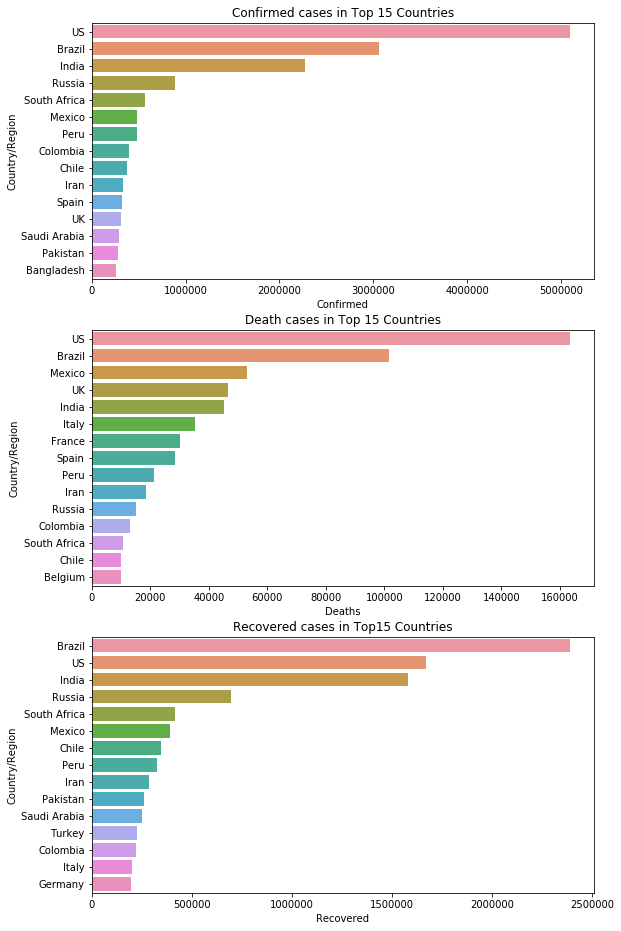

In [62]:
#Graphical representation
def plotting(column,title):
    col_sort = each.sort_values(column,ascending = False).head(15)
    sns.barplot(col_sort[column],col_sort.index)
    plt.title(title)
    
plt.figure(figsize = (9,16))
plt.subplot(311)
plotting("Confirmed","Confirmed cases in Top 15 Countries")
plt.subplot(312)
plotting("Deaths","Death cases in Top 15 Countries")
plt.subplot(313)
plotting("Recovered","Recovered cases in Top15 Countries")

In [63]:
data_copy = data.groupby('ObservationDate')['Confirmed', 'Deaths', 'Recovered'].sum()
data_copy= data_copy.reset_index().sort_values('ObservationDate')
data_copy.head()

C:\Users\SONY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555,17,28
1,01/23/2020,653,18,30
2,01/24/2020,941,26,36
3,01/25/2020,1438,42,39
4,01/26/2020,2118,56,52


In [64]:
data_w = data.groupby("Country/Region")['Confirmed','Recovered','Deaths'].sum().reset_index()
fig= dcc.Graph(id="Graph" + str(i),figure = px.choropleth(data_w, locations="Country/Region",
                    color="Confirmed", 
                    hover_name ="Country/Region",
                    locationmode='country names',
                    color_continuous_scale="blugrn",
                    range_color=[1,1000000],
                    title='Global Confirmed Cases'))

output.append(fig)
#fig.show()


C:\Users\SONY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [65]:
#Graphical Represention
x=[i.split('/')[0]+'/'+i.split('/')[1] for i in data_copy.ObservationDate ]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, 
                         y=data_copy['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='rgb(102, 102, 255)', width=2)))
fig.add_trace(go.Scatter(x=x, 
                         y=data_copy['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='rgb(255, 102, 102)', width=2)))
fig.add_trace(go.Scatter(x=x, 
                         y=data_copy['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='rgb(0,255,153)', width=2)))
fig.update_layout(
    title = 'Spread of COVID-19 over time',
    template='plotly_dark'
)
output.append(dcc.Graph(id="Graph"+str(i+1),figure = fig))
#fig.show()


# Predict Day wise Covid-19 Cases.

In [66]:
data_copy = data.copy()
data_copy

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,China,1/22/2020 17:00,1,0,0
1,01/22/2020,China,1/22/2020 17:00,14,0,0
2,01/22/2020,China,1/22/2020 17:00,6,0,0
3,01/22/2020,China,1/22/2020 17:00,1,0,0
4,01/22/2020,China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...
84149,08/10/2020,Ukraine,2020-08-11 04:35:08,953,22,652
84150,08/10/2020,Netherlands,2020-08-11 04:35:08,918,69,0
84151,08/10/2020,China,2020-08-11 04:35:08,1274,1,1268
84152,08/10/2020,Ukraine,2020-08-11 04:35:08,2154,43,1524


In [67]:
res.reset_index(inplace = True)
output.append(dcc.Graph(id="fig3",figure = px.pie(res, values='Confirmed', names='Country/Region', title='Distribution of confirmed cases globally')))
#fig.show()

In [68]:
data_copy["ObservationDate"]=pd.to_datetime(data_copy["ObservationDate"])
datewise=data_copy.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days
datewise.head()

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-01-22,555,28,17,0
2020-01-23,653,30,18,1
2020-01-24,941,36,26,2
2020-01-25,1438,39,42,3
2020-01-26,2118,52,56,4


In [69]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [70]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [71]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_linreg

array([[12675804.79603197],
       [12759892.46575503],
       [12843980.1354781 ],
       [12928067.80520116],
       [13012155.47492423],
       [13096243.14464729],
       [13180330.81437035],
       [13264418.48409342],
       [13348506.15381648],
       [13432593.82353955],
       [13516681.49326261]])

In [72]:
pd.DataFrame({'Actual':valid_ml["Confirmed"],'Predicted':prediction_valid_linreg.ravel()})

,Actual,Predicted
ObservationDate,,
2020-07-31,17599836,1.267580e+07
2020-08-01,17850479,1.275989e+07
2020-08-02,18079516,1.284398e+07
2020-08-03,18282208,1.292807e+07
2020-08-04,18540789,1.301216e+07
2020-08-05,18811953,1.309624e+07
2020-08-06,19097149,1.318033e+07
2020-08-07,19378036,1.326442e+07
2020-08-08,19637506,1.334851e+07


In [73]:
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  5767828.265106377


In [74]:
poly = PolynomialFeatures(degree = 8) 
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [75]:
lin_reg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [76]:
prediction_poly=lin_reg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  778009.7507193242


In [77]:
pd.DataFrame({'Actual':valid_ml["Confirmed"],'Predicted':prediction_poly})

,Actual,Predicted
ObservationDate,,
2020-07-31,17599836,1.766870e+07
2020-08-01,17850479,1.798673e+07
2020-08-02,18079516,1.831703e+07
2020-08-03,18282208,1.866084e+07
2020-08-04,18540789,1.901952e+07
2020-08-05,18811953,1.939453e+07
2020-08-06,19097149,1.978748e+07
2020-08-07,19378036,2.020010e+07
2020-08-08,19637506,2.063424e+07


Linear Regression is no way near the predicted value

# Time Series Data Analysis of Confirmed Cases till date on each Country (global)

In [78]:
data.head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,China,1/22/2020 17:00,1,0,0
1,01/22/2020,China,1/22/2020 17:00,14,0,0
2,01/22/2020,China,1/22/2020 17:00,6,0,0
3,01/22/2020,China,1/22/2020 17:00,1,0,0
4,01/22/2020,China,1/22/2020 17:00,0,0,0


In [79]:
covid_timeseries = data.groupby(['ObservationDate','Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum()
covid_timeseries=covid_timeseries.reset_index().sort_values('ObservationDate')

C:\Users\SONY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [80]:
fig = go.Figure()
x = [i.split('/')[0]+'/'+i.split('/')[1] for i in covid_timeseries.ObservationDate]
covid_timeseries["ObservationDate"] = x
fig = px.line(covid_timeseries, x="ObservationDate", y ="Confirmed", color="Country/Region",line_group="Country/Region", hover_name="Country/Region")
fig.update_layout(template='plotly_dark',title_text='COVID-19 confirmed cases for each country')
output.append(dcc.Graph(id="fig4",figure = fig))
#fig.show()

# Time series Data Analysis on Death cases till date global.

In [81]:
fig = px.line(covid_timeseries, x="ObservationDate", y ="Deaths", color="Country/Region",line_group="Country/Region", hover_name="Country/Region")
fig.update_layout(template='plotly_dark',title_text='COVID-19 death cases for each country')
output.append(dcc.Graph(id="fig5",figure = fig))
#fig.show()

# Time Series Data Analysis on Recovered Cases till date global.

In [82]:
fig = px.line(covid_timeseries, x="ObservationDate", y ="Recovered", color="Country/Region",line_group="Country/Region", hover_name="Country/Region")
fig.update_layout(template='plotly_dark',title_text='COVID-19 death cases for each country')
output.append(dcc.Graph(id="fig6",figure = fig))
#fig.show()

# Predict Age Cases on Covid-19 Between Age group

In [83]:
data_age.head()

,Specimen Collection Date,Age Group,New Confirmed Cases,Cumulative Confirmed Cases,Last Updated at
0,2020/03/12,51-60,2,6,08/09/2020 03:15:02 PM
1,2020/03/13,51-60,2,8,08/09/2020 03:15:02 PM
2,2020/03/14,51-60,1,9,08/09/2020 03:15:02 PM
3,2020/03/15,51-60,0,9,08/09/2020 03:15:02 PM
4,2020/03/16,51-60,8,17,08/09/2020 03:15:02 PM


In [84]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Specimen Collection Date    1177 non-null   object
 1   Age Group                   1177 non-null   object
 2   New Confirmed Cases         1177 non-null   int64 
 3   Cumulative Confirmed Cases  1177 non-null   int64 
 4   Last Updated at             1177 non-null   object
dtypes: int64(2), object(3)
memory usage: 46.1+ KB


In [85]:
data_age['Last Updated at']=pd.to_datetime(data_age['Last Updated at'])
data_age['Specimen Collection Date']=pd.to_datetime(data_age['Specimen Collection Date'])

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
values =le.fit_transform(data_age['Age Group'])
data_age['values']= values

In [88]:
data_age_copy = data_age.copy()

In [89]:
Xa=data_age.drop(['Specimen Collection Date','New Confirmed Cases','Last Updated at','Age Group'],axis=1)
ya=data_age['values']

In [90]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.1, random_state=0)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model=LogisticRegression(max_iter=1000,solver='liblinear')
model.fit(Xa_train,ya_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred_model = model.predict(Xa_test)

In [94]:
pd.DataFrame({'Actual':ya_test,'Predicted':pred_model})

,Actual,Predicted
483,0,0
933,2,2
1170,4,3
682,6,6
192,5,5
...,...,...
836,7,7
895,2,3
918,2,2
1129,4,4


In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [96]:
print(classification_report(ya_test,pred_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.50      0.88      0.64         8
           2       0.93      0.54      0.68        24
           3       0.56      0.69      0.62        13
           4       0.92      0.55      0.69        22
           5       0.52      0.86      0.65        14
           6       0.69      0.85      0.76        13
           7       0.78      0.64      0.70        11

    accuracy                           0.71       118
   macro avg       0.74      0.75      0.72       118
weighted avg       0.78      0.71      0.71       118



In [97]:
fig=px.bar(y=data_age_copy['Cumulative Confirmed Cases'],x=data_age_copy['Age Group'])
fig.update_layout(template='plotly_dark',title='Distribution Of Cases As Per Age : ',yaxis_title='Number Of Cumulative Cases',xaxis_title='Age Groups')
#fig.show()
output.append(dcc.Graph(id="fig7",figure = fig))

Age cases between 31-40 are most affected

# Predict Highly affected Age Group on global.

In [98]:
data_age2 = pd.read_csv("Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv")
data_age2 = data_age2[["Age group","COVID-19 Deaths"]]
data_age2 = data_age2.groupby("Age group").sum().reset_index()
data_age2

,Age group,COVID-19 Deaths
0,1-4 years,20.0
1,15-24 years,516.0
2,25-34 years,2997.0
3,35-44 years,8009.0
4,45-54 years,21813.0
5,5-14 years,40.0
6,55-64 years,52697.0
7,65-74 years,89561.0
8,75-84 years,112435.0
9,85 years and over,137505.0


In [99]:
data_age2 = data_age2.drop(data_age2.index[9:12])
fig=px.line(data_age2,x=data_age2["Age group"],y=data_age2["COVID-19 Deaths"],)
fig.update_layout(template='plotly_dark',title='Predicting Highly affected Age group due to Covid-19',yaxis_title='COVID-19 Deaths',xaxis_title='Age group')
#fig.show()
output.append(dcc.Graph(id="fig8",figure = fig))

In [100]:
app = JupyterDash(__name__)

In [101]:
app.layout = html.Div(children=output)

In [102]:
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


In [104]:
from pyngrok import ngrok
public_url = ngrok.connect(port = '8050')

In [105]:
public_url

'http://a1db7b5c9ed9.ngrok.io'

t=2020-08-19T15:46:02+0530 lvl=eror msg="heartbeat timeout, terminating session" obj=csess id=cc0abe68230d clientid=a31a0bfd4fe7574a6475f8b88ded7599

t=2020-08-19T15:46:02+0530 lvl=eror msg="session closed, starting reconnect loop" obj=csess id=2f5cbd4ae4bc err="session closed"

t=2020-08-19T15:46:12+0530 lvl=eror msg="failed to reconnect session" obj=csess id=2f5cbd4ae4bc err="dial tcp: i/o timeout"

t=2020-08-19T15:46:13+0530 lvl=eror msg="failed to reconnect session" obj=csess id=2f5cbd4ae4bc err="dial tcp: lookup tunnel.us.ngrok.com: no such host"

t=2020-08-19T15:46:14+0530 lvl=eror msg="failed to reconnect session" obj=csess id=2f5cbd4ae4bc err="Get https://dns.google.com/resolve?cd=true&name=tunnel.us.ngrok.com&type=AAAA: dial tcp: lookup dns.google.com: no such host"

t=2020-08-19T15:46:16+0530 lvl=eror msg="failed to reconnect session" obj=csess id=2f5cbd4ae4bc err="Get https://s3.amazonaws.com/dns.ngrok.com/tunnel.json: dial tcp: lookup s3.amazonaws.com: no such host"

t=2020